# Exploratory data analysis (EDA)

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from wordcloud import WordCloud

In [3]:
# read training essay level data
train_essay_data =pd.read_csv('./datasets/WASSA23_essay_level_with_labels_train.tsv', sep="\t")
train_essay_data

,conversation_id,article_id,essay,empathy,distress,speaker_id,gender,education,race,age,...,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern,speaker_number,split,essay_id,emotion
0,2,35,It breaks my heart to see people living in tho...,6.833333,6.625,30,1,6,3,37,...,6.5,6.0,4.857,2.0,3.429,5.0,1,train,1,Hope/Sadness
1,3,35,I wonder why there aren't more people trying t...,5.833333,6.000,19,1,6,2,32,...,5.5,4.5,3.429,2.857,2.857,2.714,1,train,2,Anger
2,5,35,"After reading the article, you can't help but ...",1.000000,1.375,17,1,6,1,29,...,6.75,7.0,4.643,2.0715,4.143,4.643,1,train,4,Sadness
3,6,213,It is so sad that someone who had such an amaz...,6.166667,6.625,16,2,5,1,28,...,4.5,3.5,5.0,4.143,4.857,5.0,1,train,5,Sadness
4,8,213,"From reading the article, it looks like the wo...",6.833333,1.000,30,1,6,3,37,...,6.5,6.0,4.857,2.0,3.429,5.0,1,train,7,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,495,218,I feel that this will become a national proble...,6.500000,6.750,30,1,6,3,37,...,6.5,6.0,4.857,2.0,3.429,5.0,2,train,994,Neutral
788,496,103,The whole situation is sketchy. The wavering r...,3.166667,6.375,16,2,5,1,28,...,4.5,3.5,5.0,4.143,4.857,5.0,2,train,995,Neutral
789,498,103,The death of a former aide to Russian Presiden...,6.000000,2.000,43,2,6,1,33,...,7.0,7.0,4.286,1.286,3.857,4.0,2,train,997,Neutral
790,499,103,Everything about Russia really freaks me out. ...,6.000000,6.000,53,2,3,1,27,...,6.0,6.0,4.0,2.286,3.571,3.714,2,train,998,Fear


In [4]:
# print column names
train_essay_data.columns.tolist()

['conversation_id',
 'article_id',
 'essay',
 'empathy',
 'distress',
 'speaker_id',
 'gender',
 'education',
 'race',
 'age',
 'income',
 'personality_conscientiousness',
 'personality_openess',
 'personality_extraversion',
 'personality_agreeableness',
 'personality_stability',
 'iri_perspective_taking',
 'iri_personal_distress',
 'iri_fantasy',
 'iri_empathatic_concern',
 'speaker_number',
 'split',
 'essay_id',
 'emotion']

In [5]:
# check for null values
train_essay_data.isnull().values.any()

False

In [6]:
# count unique values
unique_values = {}
ids_attribute = ['article_id', 'speaker_id', 'conversation_id', 'speaker_number', 'split']
for attribute in ids_attribute:
    unique_values[attribute] = train_essay_data[attribute].nunique()
unique_values

{'article_id': 100,
 'speaker_id': 59,
 'conversation_id': 396,
 'speaker_number': 2,
 'split': 1}

In [7]:
# empathy and distress statistics (known for each essay)
train_essay_data[["empathy", "distress"]].describe()


,empathy,distress
count,792.000000,792.000000
mean,4.239899,3.782513
std,2.014705,2.053606
min,1.000000,1.000000
25%,2.333333,1.750000
50%,4.666667,3.875000
75%,6.000000,6.000000
max,7.000000,7.000000


In [8]:
# count demographic categorical attributes
counts = {}
categorical_attributes = ['gender', 'education', 'race', 'age']
for attribute in categorical_attributes:
    counts[attribute] = {}
    for value in sorted(train_essay_data[attribute].unique()):
        counts[attribute][value] = train_essay_data[train_essay_data[attribute] == value].speaker_id.nunique()
counts

{'gender': {'1': 32, '2': 25, 'unknown': 2},
 'education': {'2': 6, '3': 2, '4': 8, '5': 5, '6': 28, '7': 8, 'unknown': 2},
 'race': {'1': 40, '2': 6, '3': 5, '5': 5, '6': 1, 'unknown': 2},
 'age': {'20': 1,
  '22': 1,
  '23': 1,
  '25': 1,
  '26': 1,
  '27': 1,
  '28': 5,
  '29': 3,
  '30': 5,
  '31': 2,
  '32': 2,
  '33': 6,
  '34': 5,
  '35': 1,
  '37': 3,
  '38': 2,
  '40': 3,
  '41': 2,
  '42': 1,
  '44': 1,
  '45': 2,
  '46': 3,
  '47': 2,
  '55': 1,
  '58': 1,
  '62': 1,
  'unknown': 2}}

In [9]:
education_df = pd.DataFrame.from_dict(counts['education'], orient='index', columns=['Count'])
education_df.index.name = 'Education Level'
education_df
# manca il test...


,Count
Education Level,
2,6
3,2
4,8
5,5
6,28
7,8
unknown,2


## Dataset description paper

| Education  | Count |
| -----------| ----- |
| Less than a high school diploma |
| High School diploma | 8 |
| Technical/Vocational School | 2 |
| Some college but no degree | 13 |
| Two year associate degree | 9 |
| Four year bachelor’s degree | 34 |
| Postgradute or professional degree | 9 |

In [10]:
# income statistics
income_stats = train_essay_data[["income"]].describe()
income_stats.loc['min'] = train_essay_data[train_essay_data["income"]!="unknown"]["income"].min()
income_stats.loc['max'] = train_essay_data[train_essay_data["income"]!="unknown"]["income"].max()
income_stats

,income
count,792
unique,42
top,35000
freq,83
min,10000
max,89000


In [11]:
# speaker_ids with unknown values
attributes = categorical_attributes + [
    'income',
    'personality_conscientiousness',
    'personality_openess',
    'personality_extraversion',
    'personality_agreeableness',
    'personality_stability',
    'iri_perspective_taking',
    'iri_personal_distress',
    'iri_fantasy',
    'iri_empathatic_concern']
unknown_ids = set()
for attribute in attributes:
    unknown_ids.update(train_essay_data[train_essay_data[attribute] == "unknown"].speaker_id.tolist())
unknown_ids

{26, 31}

In [12]:
# get different emotions (known for each essay)
emotions = set()
for perceived_emotion in train_essay_data['emotion'].unique():
	for emotion in perceived_emotion.split('/'):
		emotions.add(emotion)
emotions

{'Anger', 'Disgust', 'Fear', 'Hope', 'Joy', 'Neutral', 'Sadness', 'Surprise'}

<AxesSubplot:title={'center':'Number of essays per emotion for training data'}, xlabel='Emotion', ylabel='Number of essays'>

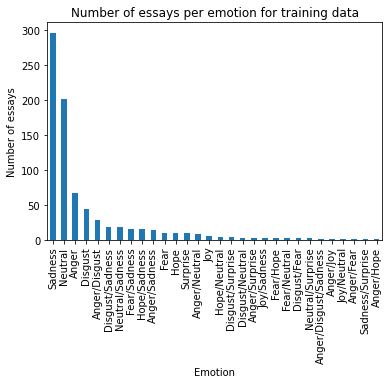

In [13]:
# plot a bar chart of the number of essays per emotion
train_essay_data['emotion'].value_counts().plot(kind='bar', title='Number of essays per emotion for training data', xlabel='Emotion', ylabel='Number of essays')

/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_2325/3901118535.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_essay_data[emotions].sum().plot(kind='bar', title='Number of essays per emotion (training data)', xlabel='Emotion', ylabel='Number of essays')


<AxesSubplot:title={'center':'Number of essays per emotion (training data)'}, xlabel='Emotion', ylabel='Number of essays'>

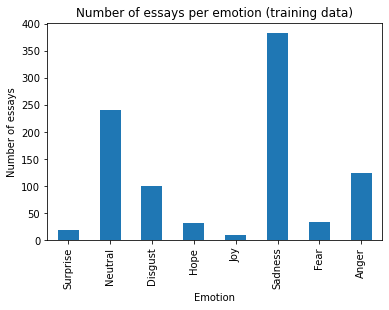

In [14]:
for emotion in emotions:
    train_essay_data[emotion] = train_essay_data["emotion"].str.contains(emotion).astype(int)
train_essay_data[emotions].sum().plot(kind='bar', title='Number of essays per emotion (training data)', xlabel='Emotion', ylabel='Number of essays')

In [26]:
# get essay with 'Joy'==1
joy_essays_train = train_essay_data[train_essay_data['Joy']==1][['essay','article_id', 'Sadness', 'Anger', 'Surprise', 'Hope', 'Fear', 'Disgust', 'Neutral']]
for index, row in joy_essays_train.iterrows():
	print(row['essay'])
	emotions = ['Joy']
	if row['Sadness']==1:
		emotions.append('Sadness')
	if row['Anger']==1:
		emotions.append('Anger')
	if row['Surprise']==1:
		emotions.append('Surprise')
	if row['Hope']==1:
		emotions.append('Hope')
	if row['Fear']==1:
		emotions.append('Fear')
	if row['Disgust']==1:
		emotions.append('Disgust')
	if row['Neutral']==1:
		emotions.append('Neutral')
	print(emotions)
	print(row['article_id'])
	print('-----------------')
joy_essays_train

The sights and sounds of war are horrible and I would never blame a person for having PTSD. I'm happy that the one solider although he has PTSD, he is working though it and wants to show people that now all people with PTSD are dangerous and there is away to heal yourself after being in a such bad of a place.
['Joy']
386
-----------------
It is nice for her to share her journey with cancer. I like how both of them connected with each other. I know that cancer is a sad thing and I'm happy they she found a way to change how she thinks about herself and thinks about life. It was interesting to see how she thought about her husband during that time.
['Joy']
289
-----------------
I am writing as regards my thoughts for Polar bears, the poster-child for climate change, are among the animals most affected by the seasonal and year-to-year changes in Arctic sea ice, because they rely on this surface for essential activities such as hunting, traveling and breeding. The researchers recommend that

,essay,article_id,Sadness,Anger,Surprise,Hope,Fear,Disgust,Neutral
21,The sights and sounds of war are horrible and ...,386,0,0,0,0,0,0,0
29,It is nice for her to share her journey with c...,289,0,0,0,0,0,0,0
35,I am writing as regards my thoughts for Polar ...,49,0,0,0,0,0,0,1
157,We need more oil and more jobs where do these ...,273,0,1,0,0,0,0,0
295,It's very difficult to fathom living somewhere...,367,1,0,0,0,0,0,0
355,"This is sad, I have not heard of this Indian P...",11,1,0,0,0,0,0,0
402,Its amazing how people facing the toughest har...,78,0,0,0,0,0,0,0
438,"I think it's always tragic when someone dies, ...",150,0,0,0,0,0,0,0
561,That was a sad story wow that was terrible wha...,417,1,0,0,0,0,0,0
681,This girl's life is forever changed. Pellets ...,163,0,0,0,0,0,0,0


In [36]:
# neutral and other emotion
neutral_other = train_essay_data[(train_essay_data['emotion'].str.contains('Neutral')) & (train_essay_data['emotion'].str.contains('/'))]
for index, row in neutral_other.iterrows():
	print(row['essay'])
	print(row['emotion'])
	print('-----------------')

I am writing as regards my thoughts for Polar bears, the poster-child for climate change, are among the animals most affected by the seasonal and year-to-year changes in Arctic sea ice, because they rely on this surface for essential activities such as hunting, traveling and breeding. The researchers recommend that the National Climate Assessment incorporate the timing of spring ice retreat and fall ice advance as measures of climate change in future reports. The study's results currently are used by the International Union for Conservation of Nature's polar bear specialist group, which completes assessments of polar bears and issues the species' conservation status. I am really pleased with this information.
Joy/Neutral
-----------------
The heartbreaking cries of girls who watched their mothers die on Thunder River Rapids ride: Two young girls, aged 10 and 13, were miraculously thrown to safety from the doomed Thunder River Rapids ride at Dreamworld on Australia's Gold Coast and watc

In [18]:
pd.DataFrame(train_essay_data[emotions].sum(), columns=['Number of essays'])

/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/122130000.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pd.DataFrame(train_essay_data[emotions].sum(), columns=['Number of essays'])


,Number of essays
Surprise,19
Disgust,100
Joy,10
Fear,33
Sadness,383
Hope,32
Neutral,240
Anger,124


/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/3243109720.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  gender1_essays[emotions].sum().plot(kind='bar', title='Number of essays per emotion (gender=1, training data)', xlabel='Emotion', ylabel='Number of essays')


<AxesSubplot:title={'center':'Number of essays per emotion (gender=1, training data)'}, xlabel='Emotion', ylabel='Number of essays'>

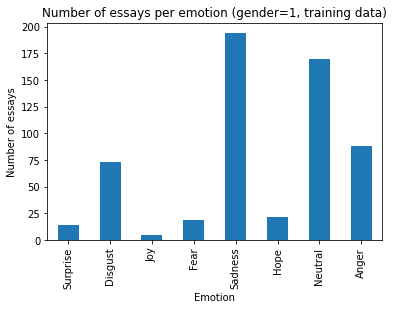

In [23]:
gender1_essays = train_essay_data[train_essay_data['gender']=='1']
gender1_essays[emotions].sum().plot(kind='bar', title='Number of essays per emotion (gender=1, training data)', xlabel='Emotion', ylabel='Number of essays')

/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/507865259.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  gender2_essays[emotions].sum().plot(kind='bar', title='Number of essays per emotion (gender=2, training data)', xlabel='Emotion', ylabel='Number of essays')


<AxesSubplot:title={'center':'Number of essays per emotion (gender=2, training data)'}, xlabel='Emotion', ylabel='Number of essays'>

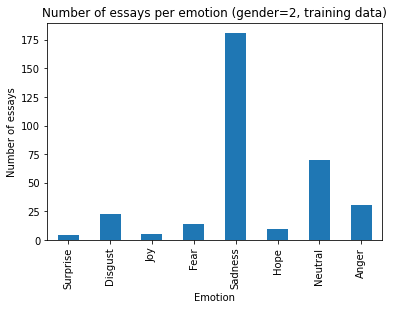

In [24]:
gender2_essays = train_essay_data[train_essay_data['gender']=='2']
gender2_essays[emotions].sum().plot(kind='bar', title='Number of essays per emotion (gender=2, training data)', xlabel='Emotion', ylabel='Number of essays')

In [28]:
emotions_per_gender = pd.DataFrame({'Gender1': gender1_essays[emotions].sum(), 'Gender2': gender2_essays[emotions].sum()})
emotions_per_gender

/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/3139402702.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  emotions_per_gender = pd.DataFrame({'Gender1': gender1_essays[emotions].sum(), 'Gender2': gender2_essays[emotions].sum()})
/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/3139402702.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  emotions_per_gender = pd.DataFrame({'Gender1': gender1_essays[emotions].sum(), 'Gender2': gender2_essays[emotions].sum()})


,Gender1,Gender2
Surprise,14,4
Disgust,73,23
Joy,5,5
Fear,19,14
Sadness,194,181
Hope,22,10
Neutral,170,70
Anger,88,31


<AxesSubplot:>

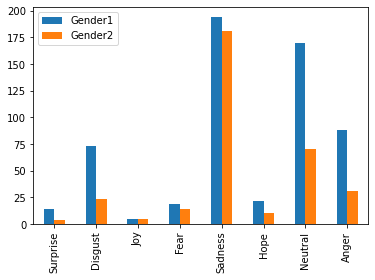

In [29]:
emotions_per_gender.plot.bar()

/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/3144420649.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  education_stats[education] = eductation_essays[emotions].sum()
/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/3144420649.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  education_stats[education] = eductation_essays[emotions].sum()
/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/3144420649.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  education_stats[education] = eductation_essays[emotions].sum()
/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/3144420649.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  education_stats[education] 

<AxesSubplot:>

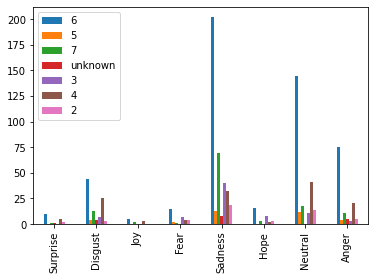

In [30]:
education_stats = {}
for education in train_essay_data['education'].unique():
	eductation_essays = train_essay_data[train_essay_data['education']==education]
	education_stats[education] = eductation_essays[emotions].sum()
pd.DataFrame(education_stats).plot.bar()

/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/2721839119.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  race_stats[race] = race_essays[emotions].sum()
/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/2721839119.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  race_stats[race] = race_essays[emotions].sum()
/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/2721839119.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  race_stats[race] = race_essays[emotions].sum()
/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/2721839119.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  race_stats[race] = race_essays[emotions].sum()
/var/folders/24/k023d_r17kq_

<AxesSubplot:>

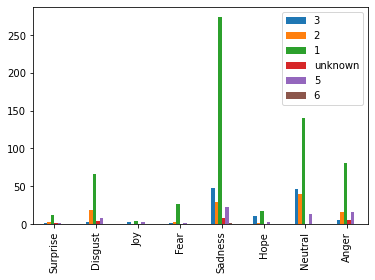

In [32]:
race_stats = {}
for race in train_essay_data['race'].unique():
	race_essays = train_essay_data[train_essay_data['race']==race]
	race_stats[race] = race_essays[emotions].sum()
pd.DataFrame(race_stats).plot.bar()

/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/315974813.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  age_stats[age_ranges_str[i]] = age_essays[emotions].sum()
/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/315974813.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  age_stats[age_ranges_str[i]] = age_essays[emotions].sum()
/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/315974813.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  age_stats[age_ranges_str[i]] = age_essays[emotions].sum()
/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/315974813.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  age_stats[age_ranges_str[i]] = age_essays[emot

<AxesSubplot:>

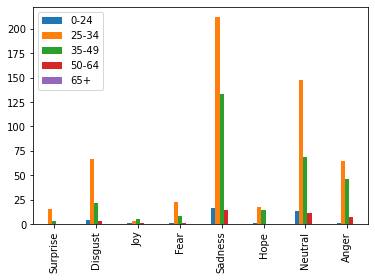

In [39]:
train_essay_data_known = train_essay_data[train_essay_data['age']!='unknown']
train_essay_data_known = train_essay_data_known.astype({"age": int})
age_ranges = [(0,24), (25,34), (35,49), (50,64), (65,200)]
age_ranges_str = ['0-24', '25-34', '35-49', '50-64', '65+']
age_stats = {}
for i, age_range in enumerate(age_ranges):
	age_essays = train_essay_data_known.query(f"age >= {age_range[0]} and age <= {age_range[1]}")
	age_stats[age_ranges_str[i]] = age_essays[emotions].sum()
pd.DataFrame(age_stats).plot.bar()

/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/3119463640.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  income_stats[income_ranges_str[i]] = income_essays[emotions].sum()
/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/3119463640.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  income_stats[income_ranges_str[i]] = income_essays[emotions].sum()
/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/3119463640.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  income_stats[income_ranges_str[i]] = income_essays[emotions].sum()
/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_3145/3119463640.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  income_stats[in

<AxesSubplot:>

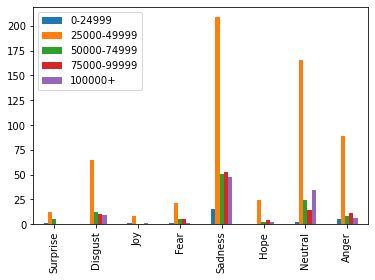

In [40]:
train_essay_data_known = train_essay_data_known.astype({"income": int})
income_ranges = [(0,24999), (25000,49999), (50000,74999), (75000,99999), (100000,100000000000)]
income_ranges_str =	['0-24999', '25000-49999', '50000-74999', '75000-99999', '100000+']
income_stats = {}
for i, income_range in enumerate(income_ranges):
	income_essays = train_essay_data_known.query(f"income >= {income_range[0]} and income <= {income_range[1]}")
	income_stats[income_ranges_str[i]] = income_essays[emotions].sum()
pd.DataFrame(income_stats).plot.bar()


<AxesSubplot:title={'center':'Number of essays with multiple emotions (training data)'}, xlabel='Multiple emotions', ylabel='Number of essays'>

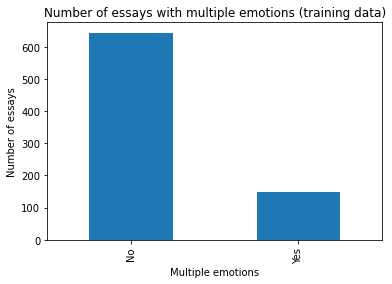

In [12]:
# add a Yes/No colum if multiple emotions had been perceived
train_essay_data['multiple_emotions'] = train_essay_data['emotion'].apply(lambda x: "Yes" if len(x.split("/")) > 1 else "No")

# plot a bar chart of the number of essays with multiple emotions
train_essay_data['multiple_emotions'].value_counts().plot(kind='bar', title='Number of essays with multiple emotions (training data)', xlabel='Multiple emotions', ylabel='Number of essays')


/Users/irenetesta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


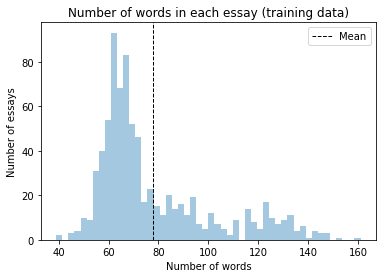

In [13]:
# get word count for each essay
train_essay_data['essay_word_count'] = train_essay_data['essay'].apply(lambda x: len(x.split()))

# plot a histogram
sns.distplot(train_essay_data['essay_word_count'], kde=False, bins=50)

# add a vertical line to the plot to show the mean
plt.axvline(train_essay_data['essay_word_count'].mean(), color='k', linestyle='dashed', linewidth=1)

# add title, labels and legend
plt.title('Number of words in each essay (training data)')
plt.xlabel('Number of words')
plt.ylabel('Number of essays')
plt.legend({'Mean':train_essay_data['essay_word_count'].mean()})

In [14]:
train_essay_data['essay_word_count'].max()

161

<AxesSubplot:xlabel='empathy', ylabel='distress'>

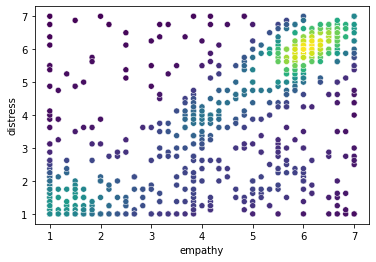

In [15]:
# scatter plot of empathy and distress colored by frequency
values = np.vstack([train_essay_data["empathy"], train_essay_data["distress"]])
kernel = stats.gaussian_kde(values)(values)
sns.scatterplot(x='empathy', y='distress', data=train_essay_data, c=kernel) # cmap="Blues", alpha=0.5

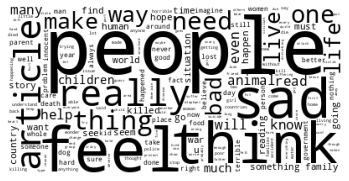

In [16]:
# word cloud of essays
word_cloud_all = WordCloud(
    collocations=False,
    background_color='white',
    color_func=lambda *args,
    **kwargs: "black"
    ).generate(' '.join(train_essay_data['essay'].tolist()))
plt.axis('off')
plt.imshow(word_cloud_all)

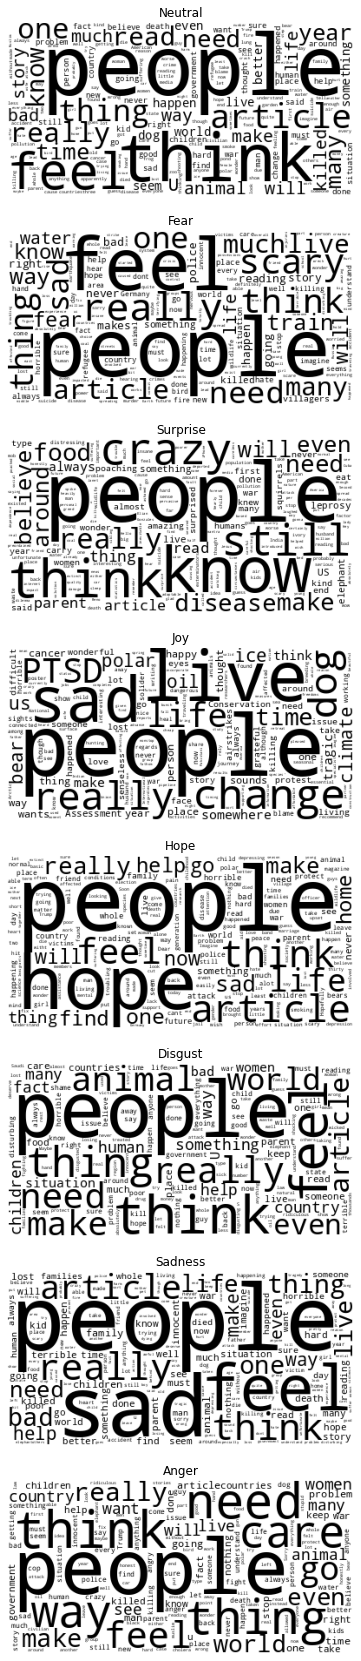

In [17]:
# word cloud of essays for each emotion
fig, axs = plt.subplots(nrows=len(emotions), ncols=1, figsize=(20, 30))
for i, emotion in enumerate(emotions):
	word_cloud = WordCloud(
		collocations=False,
		background_color='white',
		color_func=lambda *args,
		**kwargs: "black"
		).generate(' '.join(train_essay_data[train_essay_data['emotion'].str.contains(emotion)]['essay'].tolist()))
	axs[i].imshow(word_cloud)
	axs[i].set_title(emotion)
	axs[i].axis('off')
plt.show()

In [18]:
# function used to evaluate emotions
to_round = 4
def calculatePRF_MLabel(gold,prediction):
	"""
	gold/prediction list of list of emo predictions 
	"""
	# initialize counters
	# labels = set(gold+prediction)

	gold = [k.lower().split('/') for k in gold]
	prediction = [k.lower().split('/') for k in prediction]

	from sklearn.preprocessing import MultiLabelBinarizer
	from sklearn.metrics import precision_recall_fscore_support, jaccard_score
	mlb = MultiLabelBinarizer()
	mlb.fit(gold)

	y_true = mlb.transform(gold)
	y_pred = mlb.transform(prediction)

	microprecision, microrecall, microf, s = precision_recall_fscore_support(y_true, y_pred, average='micro')
	macroprecision, macrorecall, macroF, s = precision_recall_fscore_support(y_true, y_pred, average='macro')

	accuracy = jaccard_score(y_true, y_pred, average='micro')

	return round(microrecall,to_round),round(microprecision,to_round),round(microf,to_round),round(macrorecall,to_round),round(macroprecision,to_round),round(macroF,to_round),round(accuracy,to_round)

In [19]:
# example of evaluation
calculatePRF_MLabel(gold=['Sadness/Hope'],prediction=['Sadness'])

/Users/irenetesta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5, 1.0, 0.6667, 0.5, 0.5, 0.5, 0.5)